In [57]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import metrics

In [58]:
def polynomial(x):
  return 5 * x**3 - 10 * x**2 - 20 * x + 10

simple DNN

In [64]:
input = Input((1,))
x = Dense(32, activation='relu', name='dense_1')(input)
x = Dense(64, activation='relu', name='dense_2')(x)
x = Dense(128, activation='relu', name='dense_3')(x)
output = Dense(1, name='output')(x)

model = Model(input, output)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Prepare Datapoints

In [69]:
n = 400
x = np.linspace(-20,20,n)
np.random.seed(42)
np.random.shuffle(x)
y = polynomial(x)

Normalize the data to range [-1,1] (min-max normalization technique is used)

In [61]:
norm_x = ((x-np.min(x)) / (np.max(x) - np.min(x)))*2 - 1
norm_y = ((y-np.min(y)) / (np.max(y) - np.min(y)))*2 - 1

Split & Prepare dataset

In [62]:
test_len = int (0.05 * len(norm_x))
val_len = int (0.05 * len(norm_x))
train_len = len(norm_x) - test_len - val_len

trainX, trainY = norm_x[:train_len], norm_y[:train_len]
testX, testY = norm_x[train_len:train_len+test_len], norm_y[train_len:train_len+test_len]
valX, valY = norm_x[train_len+test_len:train_len+test_len+val_len], norm_y[train_len+test_len:train_len+test_len+val_len]

In [66]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[metrics.R2Score(name='accuracy')])
history = model.fit(trainX, trainY,batch_size=32, epochs=10, validation_data=(valX, valY))

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2411 - loss: 0.1192 - val_accuracy: 0.7065 - val_loss: 0.0345
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7347 - loss: 0.0397 - val_accuracy: 0.7206 - val_loss: 0.0328
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8181 - loss: 0.0281 - val_accuracy: 0.8037 - val_loss: 0.0231
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.0194 - val_accuracy: 0.8317 - val_loss: 0.0198
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8904 - loss: 0.0157 - val_accuracy: 0.8888 - val_loss: 0.0131
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9301 - loss: 0.0107 - val_accuracy: 0.9305 - val_loss: 0.0082
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9520 - loss: 0.0071 - val_accuracy: 0.9321 - val_loss: 0.0080
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - loss: 0.0056 - val_accuracy: 0.9583 - val_loss

In [67]:
eval = model.evaluate(testX, testY)
# Predict on test data
predictions = model.predict(testX)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9790 - loss: 0.0025


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


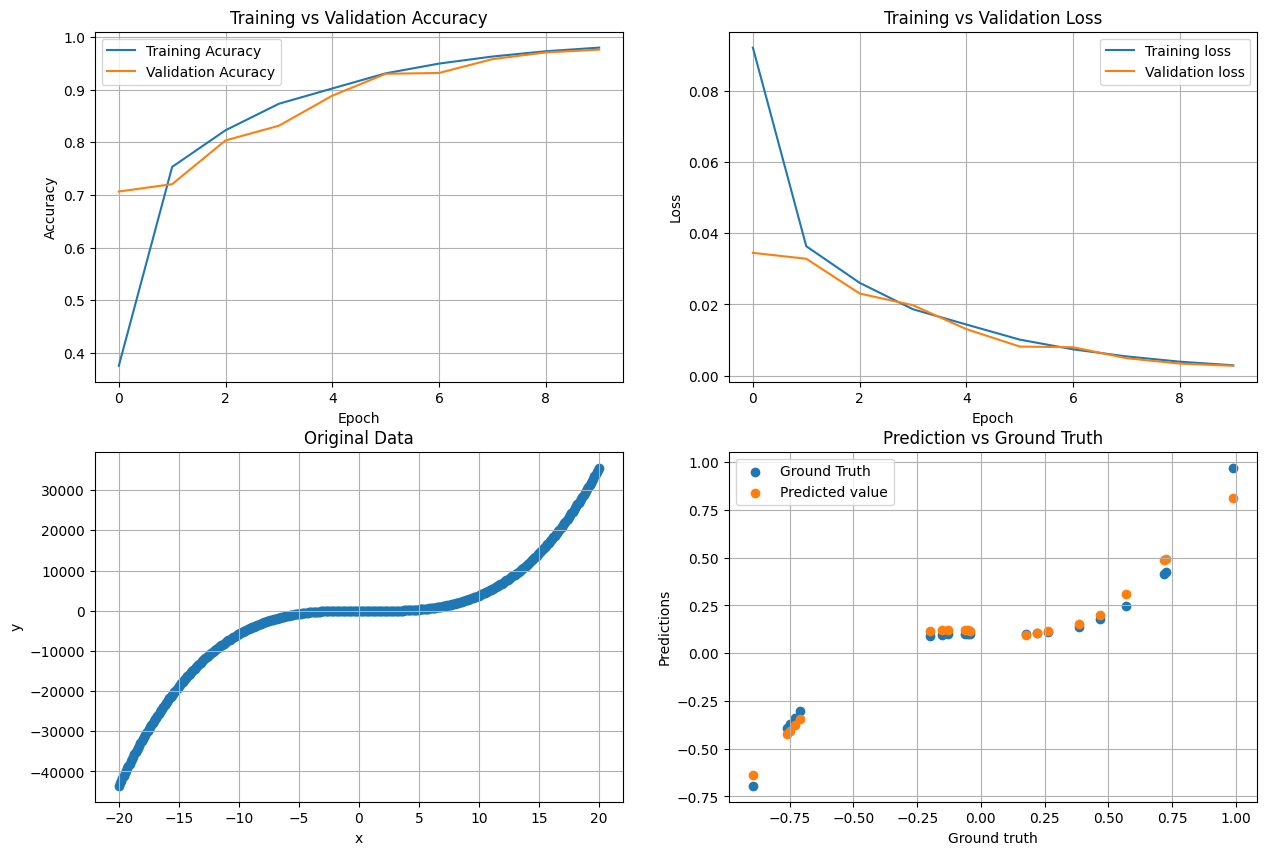

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label = 'Training Acuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Acuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Training vs Validation Loss')


# Plot prediction accuracy vs ground truth(normalized)
plt.subplot(2,2,4)
plt.scatter(testX, testY)
plt.scatter(testX, predictions)
plt.ylabel('Predictions')
plt.xlabel('Ground truth')
plt.title('Prediction vs Ground Truth')
plt.legend(['Ground Truth', 'Predicted value'])
plt.grid()

# original datapoint
plt.subplot(2,2,3)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data')
plt.grid()
plt.show()